In [146]:
from math import radians, cos, sin, asin, sqrt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scripts.utils as u

plt.rcParams['figure.figsize'] = 20,20

In [78]:
clustered_traffic_df, clustered_topology_df = u.load_clustered_data()

In [79]:
clustered_topology_df["type"] = clustered_topology_df["bs"].apply(lambda x: x.split("_")[0])
clustered_topology_df["fog"] = clustered_topology_df["bs"].apply(lambda x: int(x.split("_")[1])*10)
clustered_topology_df["bs"] = clustered_topology_df["bs"].apply(lambda x: int(x.split("_")[1])*10 + int(x.split("_")[2]) + 1 if x.split("_")[0] != "fog" else int(x.split("_")[1])*10)

In [82]:
clustered_topology_df

,bs,lat,lon,type,fog
0,0,13.135445,111.003822,fog,0
1,10,13.165947,111.053027,fog,10
2,20,13.185916,111.201265,fog,20
3,30,13.050958,111.184211,fog,30
4,40,13.210947,111.001607,fog,40
5,50,13.132308,111.089967,fog,50
6,60,13.297556,111.196913,fog,60
7,70,13.068827,111.104981,fog,70
8,80,13.053520,111.036680,fog,80
9,90,13.212176,111.097523,fog,90


In [16]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [172]:
def create_dist_df(df):
    df.reset_index(drop=True, inplace=True)

    dist_dict = {"from": [], "to": [], "distance": []}
    dist_matrix = np.zeros([len(df), len(df)])
    
    fog_list = clustered_topology_df[clustered_topology_df["type"] == "fog"]["bs"]
    
    for fog_id in fog_list:
        connected_nodes = df[(df["fog"] == fog_id) | (df["type"] == "fog")]

        for i in connected_nodes.itertuples():
            idx_i, bs_from, lat_i, lon_i, type_i, fog_i = i[0], i[1], i[2], i[3], i[4], i[5]
            
            if type_i == "rrh" or fog_i != fog_id:
                continue
                
            for j in connected_nodes.itertuples():
                idx_j, bs_to, lat_j, lon_j, type_j = j[0], j[1], j[2], j[3], j[4]
                
                print(f"{type_i} ({bs_from}) connected to {type_j} ({bs_to})")

                dist_dict["from"].append(bs_from)
                dist_dict["to"].append(bs_to)
                dist_dict["distance"].append(haversine(lon_i, lat_i, lon_j, lat_j))

    
    return pd.DataFrame.from_dict(dist_dict)

In [173]:
dist_matrix = create_dist_df(clustered_topology_df) 

fog (0) connected to fog (0)
fog (0) connected to fog (10)
fog (0) connected to fog (20)
fog (0) connected to fog (30)
fog (0) connected to fog (40)
fog (0) connected to fog (50)
fog (0) connected to fog (60)
fog (0) connected to fog (70)
fog (0) connected to fog (80)
fog (0) connected to fog (90)
fog (0) connected to rrh (1)
fog (0) connected to rrh (2)
fog (0) connected to rrh (3)
fog (10) connected to fog (0)
fog (10) connected to fog (10)
fog (10) connected to fog (20)
fog (10) connected to fog (30)
fog (10) connected to fog (40)
fog (10) connected to fog (50)
fog (10) connected to fog (60)
fog (10) connected to fog (70)
fog (10) connected to fog (80)
fog (10) connected to fog (90)
fog (10) connected to rrh (11)
fog (10) connected to rrh (12)
fog (10) connected to rrh (13)
fog (20) connected to fog (0)
fog (20) connected to fog (10)
fog (20) connected to fog (20)
fog (20) connected to fog (30)
fog (20) connected to fog (40)
fog (20) connected to fog (50)
fog (20) connected to fog (

In [174]:
dist_matrix

,from,to,distance
0,0,0,0.000000
1,0,10,6.315838
2,0,20,22.102390
3,0,30,21.678280
4,0,40,8.398827
...,...,...,...
125,90,80,18.831806
126,90,90,0.000000
127,90,91,0.671906
128,90,92,0.265311


In [181]:
dist_matrix.to_csv('../sensor_distance.csv', index=False)

In [180]:
# TODO: fazer uma função pra salvar isso aqui pra um arquivo de ids
# sensor_graph_ids.txt
clustered_topology_df['bs'].values

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90,  1,  2,  3, 11, 12, 13, 21,
       22, 23, 31, 32, 33, 41, 42, 43, 51, 52, 53, 61, 62, 63, 71, 72, 73,
       81, 82, 83, 91, 92, 93])

## Graph manipulation

In [30]:
import networkx as nx

In [176]:
sensor_ids = clustered_topology_df['bs'].values
normalized_k = 0.1
num_sensors = len(sensor_ids)
dist_mx = np.zeros((num_sensors, num_sensors), dtype=np.float32)
dist_mx[:] = np.inf
# Builds sensor id to index map.
sensor_id_to_ind = {}

for i, sensor_id in enumerate(sensor_ids):
    sensor_id_to_ind[sensor_id] = i

# Fills cells in the matrix with distances.
for row in dist_matrix.values:
    if row[0] not in sensor_id_to_ind or row[1] not in sensor_id_to_ind:
        continue
    dist_mx[sensor_id_to_ind[row[0]], sensor_id_to_ind[row[1]]] = row[2]

# Calculates the standard deviation as theta.
distances = dist_mx[~np.isinf(dist_mx)].flatten()
std = distances.std()
adj_mx = np.exp(-np.square(dist_mx / std))
# Make the adjacent matrix symmetric by taking the max.
# adj_mx = np.maximum.reduce([adj_mx, adj_mx.T])

# Sets entries that lower than a threshold, i.e., k, to zero for sparsity.
adj_mx[adj_mx < normalized_k] = 0

In [177]:
adj_mx[0]

array([1.        , 0.61677444, 0.        , 0.        , 0.42546514,
       0.34796125, 0.        , 0.12017614, 0.3138774 , 0.11899003,
       0.99929225, 0.99998283, 0.99941885, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

{0: Text(-0.3989866331934485, 0.13923088139008755, '0'),
 1: Text(-0.19730684489525827, 0.19068864103727803, '10'),
 2: Text(0.4061848380271089, -0.41098990699546634, '20'),
 3: Text(0.228049336900703, 0.48188144572308017, '30'),
 4: Text(-0.350151110232612, 0.3165481683902033, '40'),
 5: Text(-0.11866968314400653, 0.013309569802848217, '50'),
 6: Text(0.756504131067008, -0.867949520711445, '60'),
 7: Text(-0.027915403379945667, 0.2121967037396521, '70'),
 8: Text(-0.3472503294769247, -0.029529691221646125, '80'),
 9: Text(0.009341317719071087, -0.024472305838037865, '90'),
 10: Text(-0.5596041500059329, 0.08087533061599379, '1'),
 11: Text(-0.5521273712406141, 0.22128693001379066, '2'),
 12: Text(-0.5772801571084086, 0.1519549567078734, '3'),
 13: Text(-0.13796690286616986, 0.31675839685879476, '11'),
 14: Text(-0.20422521090974732, 0.3630140915864629, '12'),
 15: Text(-0.2612582297602143, 0.2933922909937313, '13'),
 16: Text(0.5494348435905902, -0.39569010961228923, '21'),
 17: Text(

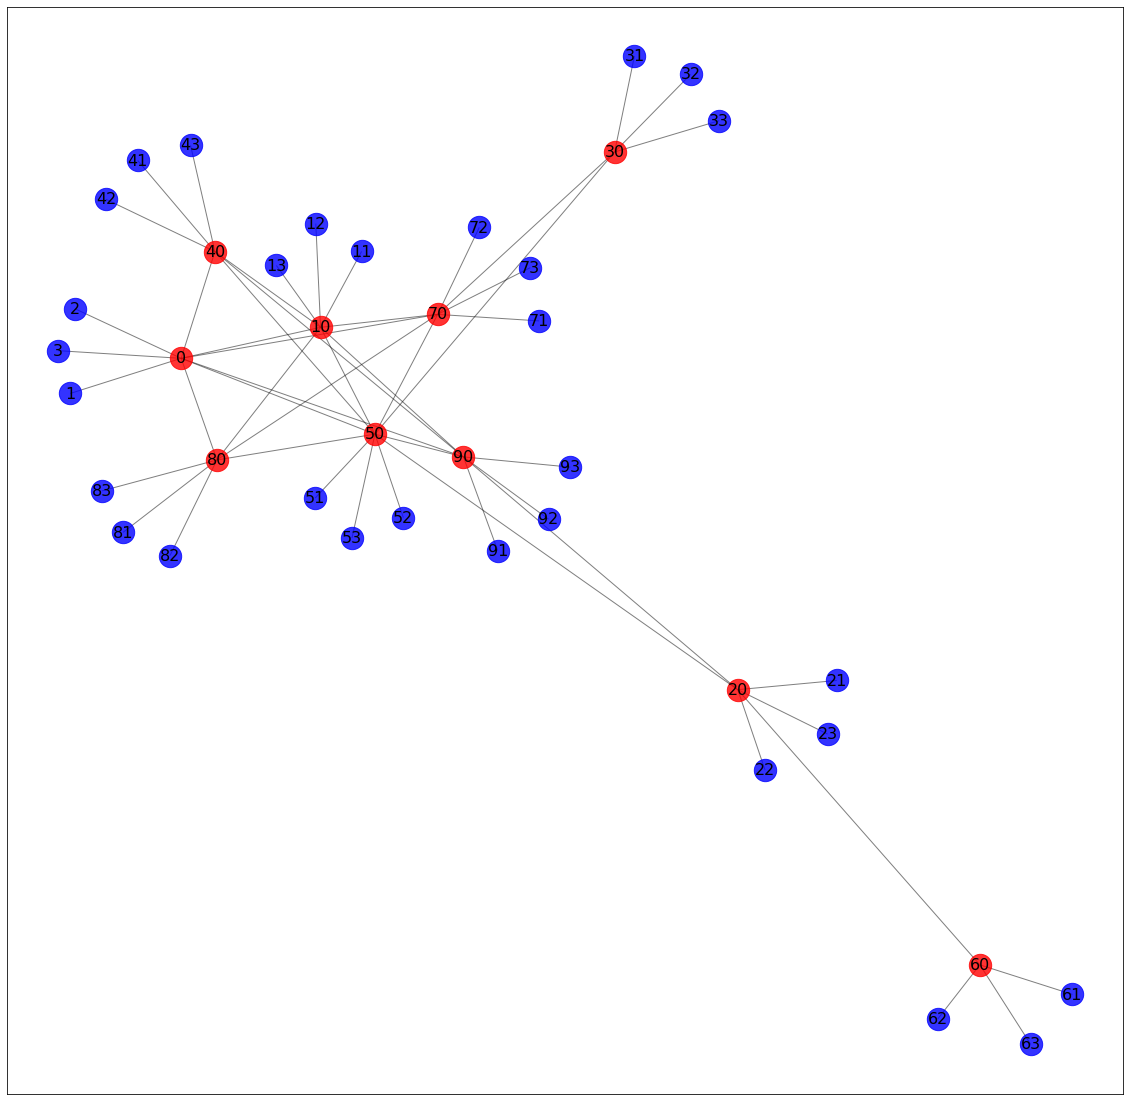

In [183]:
G = nx.from_numpy_matrix(adj_mx)
pos=nx.spring_layout(G) 
G.edges(data=True)

nx.draw_networkx_nodes(G,pos,
                       nodelist=clustered_topology_df[clustered_topology_df["type"] == "fog"]["bs"].index,
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=clustered_topology_df[clustered_topology_df["type"] == "rrh"]["bs"].index,
                       node_color='b',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)


labels = {}
for idx, val in enumerate(clustered_topology_df["bs"].values):
    labels[idx] = val


nx.draw_networkx_labels(G,pos,labels,font_size=16)